In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

# Replace this path with the actual path to your model file on Google Drive
model_path = '/content/drive/MyDrive/mnist_model.h5'
model = load_model(model_path)

In [ ]:
from google.colab.output import eval_js
from IPython.display import display, Javascript
import cv2
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
import base64

# Helper to convert JS image data to OpenCV format
def js_to_image(js_reply):
    image_bytes = io.BytesIO(base64.b64decode(js_reply.split(',')[1]))
    img = Image.open(image_bytes)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Webcam capture and prediction
def capture_and_predict(model):
    js = Javascript('''
      async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);
        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
        await new Promise((resolve) => capture.onclick = resolve);
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', 0.8);
      }
    ''')
    display(js)

    try:
        data = eval_js('takePhoto()')
        img = js_to_image(data)

        # Convert to grayscale and resize to 28x28
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28))
        normalized = resized / 255.0
        reshaped = normalized.reshape(1, 784)

        # Predict
        predictions = model.predict(reshaped)
        prediction = np.argmax(predictions)
        confidence = predictions[0][prediction]

        # Show captured and processed image
        plt.figure(figsize=(3,3))
        plt.imshow(resized, cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f"Prediction = {prediction} (Confidence = {confidence:.2f})", color='b')
        plt.show()

    except Exception as e:
        print("not number")



<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


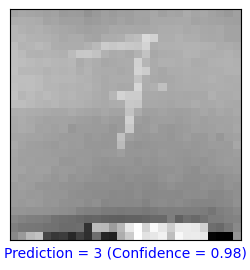

In [ ]:
capture_and_predict(model)

First, mount your Google Drive.

Now you can load the model by providing the correct path to the `.h5` file on your Google Drive. Replace `/content/drive/My Drive/path/to/your/model/mnist_model.h5` with the actual path to your model file.